# 生成初始状态

In [1]:
import random
import time
import math
f = open("eightPuzzleTest.txt", "w")
testCaseCount = 50
result = ""
while testCaseCount > 0:
    board = [0,1,2,3,4,5,6,7,8]
    random.shuffle(board)
  
    testCaseCount -= 1
    for i in range(0,8): # i = 0 1 2 3 4 5 6 7
        result += str(board[i]) + ' '
    result += str(board[i+1]) + '\n' #! i+1=8
print(result)
f.write(result)
f.close()

5 6 4 7 1 8 3 2 0
3 8 4 6 7 2 5 1 0
1 5 0 4 8 7 3 6 2
2 1 0 8 6 5 7 3 4
1 8 3 4 7 5 2 6 0
8 5 2 3 4 6 0 1 7
3 5 8 0 6 7 2 4 1
1 2 4 6 5 7 0 3 8
7 5 8 3 0 4 6 2 1
1 5 0 4 7 6 2 3 8
4 1 6 3 8 7 2 0 5
8 1 2 5 7 6 4 0 3
3 7 8 4 0 6 5 2 1
5 2 7 6 8 3 0 1 4
8 2 0 5 3 1 7 4 6
0 3 7 6 8 4 1 2 5
6 3 1 2 8 5 0 7 4
2 4 7 0 1 6 5 8 3
6 0 3 8 7 2 1 5 4
6 3 8 0 2 1 5 4 7
8 4 1 2 6 7 3 0 5
5 0 3 2 8 7 6 4 1
3 4 5 7 6 1 0 8 2
3 7 6 8 1 4 0 5 2
6 5 8 3 0 1 4 7 2
6 2 8 1 3 4 5 7 0
6 1 2 5 3 0 4 8 7
6 3 2 7 1 4 8 5 0
2 7 8 0 3 6 5 4 1
7 4 2 0 3 8 1 5 6
2 7 8 0 1 5 6 3 4
3 7 2 6 4 5 0 8 1
1 2 0 7 8 3 4 5 6
7 8 5 1 6 3 2 0 4
0 5 8 3 2 6 4 7 1
8 0 4 6 3 5 2 1 7
4 2 0 7 1 6 8 5 3
1 6 2 8 3 0 5 7 4
4 1 6 3 2 5 7 8 0
4 2 8 5 0 1 6 3 7
6 7 4 2 1 5 8 3 0
4 6 3 0 1 8 7 2 5
3 0 5 2 6 8 4 1 7
2 1 3 0 5 4 8 7 6
3 2 7 4 8 0 1 6 5
8 6 7 0 2 1 4 3 5
6 2 1 4 0 8 7 5 3
2 4 7 0 5 1 6 8 3
6 0 5 3 8 2 7 1 4
2 3 8 4 1 7 0 5 6



计算启发式代价

In [2]:
# manhattan_distance
def getManhattanDistance(board):
    distance = 0
    for i in range(len(board)):
        distance += abs(i/3 - board[i]/3) + abs(i%3 - board[i]%3)
    return distance

# 求解方法

## 最陡爬山
移动到启发式代价最小的位置

In [3]:
def step_steepestHillClimbing(board):
    for i in range(len(board)):
        if board[i] == 0:
            break
    distanceBoard = {}
    if i >= 3:
        upBoard = list(board)
        upBoard[i] = board[i-3]
        upBoard[i-3] = 0
        distanceBoard[i-3] = getManhattanDistance(upBoard)
    if i < 6:
        downBoard = list(board)
        downBoard[i] = board[i+3]
        downBoard[i+3] = 0
        distanceBoard[i+3] = getManhattanDistance(downBoard)
    if i%3 != 0:
        leftBoard = list(board)
        leftBoard[i] = board[i-1]
        leftBoard[i-1] = 0
        distanceBoard[i-1] = getManhattanDistance(leftBoard)
    if (i+1)%3 != 0:
        rightBoard = list(board)
        rightBoard[i] = board[i+1]
        rightBoard[i+1] = 0
        distanceBoard[i+1] = getManhattanDistance(rightBoard)
    # 最小代价，改成 getManhattanDistance(board) - 1 即可寻找更优解
    shortestDistance = getManhattanDistance(board)
    for point,value in distanceBoard.items():
        # "<=" means "not worse than" situation
        # plain
        if value <= shortestDistance:
            shortestDistance = value
    
    shortestDistancePoints = []
    for point,value in distanceBoard.items():
        if value == shortestDistance:
            shortestDistancePoints.append(point)
    
    # can not find a steeper move
    # we have come to the peek(local optimization)
    if len(shortestDistancePoints) == 0:
        # print "local optimization"
        global FAILED
        FAILED = True
        return board
    
    random.shuffle(shortestDistancePoints)
    board[i] = board[shortestDistancePoints[0]]
    board[shortestDistancePoints[0]]= 0
    return board

def solution_steepestHillClimbing(board):
    # For each case, there are only several situations using this solution.
    # In average, we will reach a local optimization within 100 steps
    # or fall into a infinite loop (a plain) within 100 steps.
    maxRound = 400
    count = 0
    while True:
        count += 1
        collisionNum = getManhattanDistance(board)
        # print count, collisionNum
        if collisionNum == 0:
            return board
        board = step_steepestHillClimbing(board)
        global FAILED
        if FAILED:
            return board
        if(count >= maxRound):
            # for i in range(0,len(board)):
            #     print board[i]
            FAILED = True
            return board

## 首选爬山
随机生成下一个状态，只要不变差就转移

In [4]:
def step_FirstChoiceHillClimbing(board):
    for i in range(len(board)):
        if board[i] == 0:
            break
    distance = getManhattanDistance(board)
    maxRound = 16 # 连续20次都不产生某个数的概率为 1%，可认为能够遍历四个方向。
    count = 0
    while True:
        count += 1
        if(count >= maxRound):
            global FAILED
            FAILED = True
            return board
        # 产生新解，如果空白块在边界则重新生成方向
        while True:
            randCase = random.randint(0,4)
            newBoard = list(board)
            if randCase == 0 and i>=3:
                newBoard[i] = board[i-3]
                newBoard[i-3] = 0
                break
            elif randCase == 1 and i<6:
                newBoard[i] = board[i+3]
                newBoard[i+3] = 0
                break
            elif randCase == 2 and i%3 != 0:
                newBoard[i] = board[i-1]
                newBoard[i-1] = 0
                break
            elif randCase == 3 and (i+1)%3 != 0:
                newBoard[i] = board[i+1]
                newBoard[i+1] = 0
                break

        if getManhattanDistance(newBoard) < distance:
            return newBoard
        break
        
    return board

def solution_FirstChoiceHillClimbing(board):
    maxRound = 400
    count = 0
    while True:
        collisionNum = getManhattanDistance(board)
        if collisionNum == 0:
            return board
        board = step_FirstChoiceHillClimbing(board)
        count += 1
        if(count >= maxRound):
            global FAILED
            FAILED = True
            return board

## 随机重启爬山
使用最陡爬山法，若找不到解，就生成一组新的初始状态。采用递归实现，递归结束条件：重启超过50轮，或者达到目标状态。

In [5]:
global restart_cnt
restart_cnt = 0

def solution_RandomHillClimbing(board):
    global restart_cnt
    global FAILED
    if restart_cnt > 1000:  # 最多重启500轮
        FAILED = True
        return board
    board = solution_FirstChoiceHillClimbing(board)
    if FAILED:  # 失败则重启
        FAILED = False  # 一定要重置 FAILED 标志！
        restart_cnt += 1
        for col in range(0,7):
            board[col] = random.randint(0,7)
        # 再次搜索（递归）
        board = solution_RandomHillClimbing(board)
    return board

## 模拟退火
以概率$e^{-\frac{\Delta E}{T}}$ 接受更差的状态。
温度越低，接受更差状态的概率越小。

In [6]:
def solution_SimulatedAnnealing(board):
    temperature = 20  # 初温
    annealingRate = 0.80  # 降温速度
    stop_temprature = temperature * annealingRate ** 100  # 停止温度
    maxRound = 1000  # 每个温度循环次数
    cnt = 0  # 记录搜索次数
    while temperature > stop_temprature:
        for iteration in range(maxRound):
            cnt += 1
            for i in range(len(board)):
                if board[i] == 0:
                    break
            # 产生新解(如果在边界则重新生成方向)
            while True:
                randCase = random.randint(0,4)
                newBoard = list(board)
                if randCase == 0 and i>=3:
                    newBoard[i] = board[i-3]
                    newBoard[i-3] = 0
                    break
                elif randCase == 1 and i<6:
                    newBoard[i] = board[i+3]
                    newBoard[i+3] = 0
                    break
                elif randCase == 2 and i%3 != 0:
                    newBoard[i] = board[i-1]
                    newBoard[i-1] = 0
                    break
                elif randCase == 3 and (i+1)%3 != 0:
                    newBoard[i] = board[i+1]
                    newBoard[i+1] = 0
                    break
            newDistance = getManhattanDistance(newBoard)
            originDistance = getManhattanDistance(board)
            if newDistance == 0:
                print(cnt)
                return newBoard
            # 接受新解条件，如果newDistance更小，下式一定成立！
            if random.random() < math.exp(-(newDistance - originDistance) / temperature):
                board = newBoard

        temperature = temperature * annealingRate
    global FAILED
    FAILED = True
    return board

In [7]:
def step_SimulatedAnnealing(board):
    temperature = len(board)
    annealingRate = 0.95
    
    for i in range(len(board)):
        if board[i] == 0:
            break
    distance = getManhattanDistance(board)
    temperature = max(temperature * annealingRate, 0.02)
    while True:
        randCase = random.randint(0,4)
        if randCase == 0:
            if i >= 3:
                upBoard = list(board)
                upBoard[i] = board[i-3]
                upBoard[i-3] = 0
                if getManhattanDistance(upBoard) < distance:
                    return upBoard
                else:
                    deltaE = getManhattanDistance(upBoard) - distance
                    acceptProbability = min(math.exp(deltaE / temperature), 1)
                    if random.random() <= acceptProbability:
                        return upBoard
        elif randCase == 1:
            if i < 6:
                downBoard = list(board)
                downBoard[i] = board[i+3]
                downBoard[i+3] = 0
                if getManhattanDistance(downBoard) < distance:
                    return downBoard
                else:
                    deltaE = getManhattanDistance(downBoard) - distance
                    acceptProbability = min(math.exp(deltaE / temperature), 1)
                    if random.random() <= acceptProbability:
                        return downBoard
        elif randCase == 2:
            if i%3 != 0:
                leftBoard = list(board)
                leftBoard[i] = board[i-1]
                leftBoard[i-1] = 0
                if getManhattanDistance(leftBoard) < distance:
                    return leftBoard
                else:
                    deltaE = getManhattanDistance(leftBoard) - distance
                    acceptProbability = min(math.exp(deltaE / temperature), 1)
                    if random.random() <= acceptProbability:
                        return leftBoard
        else:    
            if (i+1)%3 != 0:
                rightBoard = list(board)
                rightBoard[i] = board[i+1]
                rightBoard[i+1] = 0
                if getManhattanDistance(rightBoard) < distance:
                    return rightBoard
                else:
                    deltaE = getManhattanDistance(rightBoard) - distance
                    acceptProbability = min(math.exp(deltaE / temperature), 1)
                    if random.random() <= acceptProbability:
                        return rightBoard
                    
    return board

def solution_SimulatedAnnealing(board):
    # the success rate will increase by increasing the maxRound
    maxRound = 500000
    count = 0
    while True:
        collisionNum = getManhattanDistance(board)
        if collisionNum == 0:
            print (count)
            return board
        board = step_SimulatedAnnealing(board)
        count += 1
        if(count >= maxRound):
            global FAILED
            FAILED = True
            return board

# 求解结果

In [8]:
def test(method):
    startTime = time.perf_counter()
    successCase = 0
    totalCase = 0
    result = "EightPuzzle" + method + " result:\n\n"
    with open("eightPuzzleTest.txt", "r") as ins:
        for line in ins:
            global FAILED
            FAILED = False
            global restart_cnt
            restart_cnt = 0
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            if method == 'SteepestHillClimbing':
                board = solution_steepestHillClimbing(board)
            elif method == 'FirstChoiceHillClimbing':
                board = solution_FirstChoiceHillClimbing(board)
            elif method == 'RandomHillClimbing':
                board = solution_RandomHillClimbing(board)
            else:
                board = solution_SimulatedAnnealing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"

    endTime = time.perf_counter()
    performance = "EightPuzz-" + method +':\n'
    performance += "Total time: " + str(endTime - startTime) + '\n'
    performance += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    performance += "Success rate: " + str(successCase / float(totalCase)) + '\n'
    f = open('EightPuzzle_ '+method+ '.txt', 'w')
    f.write(result)
    f.write(performance)
    f.close()
    print(performance)
    return[endTime - startTime, successCase / float(totalCase)]

## 测试

In [9]:
[t1, a1] = test('SteepestHillClimbing')
[t2, a2] = test('FirstChoiceHillClimbing')
[t3, a3] = test('RandomHillClimbing')
[t4, a4] = test('SimulatedAnnealing')

EightPuzz-SteepestHillClimbing:
Total time: 0.014289800000000241
Total case number: 50, Success case number: 0
Success rate: 0.0

EightPuzz-FirstChoiceHillClimbing:
Total time: 0.44869290000000017
Total case number: 50, Success case number: 0
Success rate: 0.0

EightPuzz-RandomHillClimbing:
Total time: 282.4829698
Total case number: 50, Success case number: 0
Success rate: 0.0

467632
78067
350052
154646
144424
407214
432482
454573
157892
312618
228102
441477
233963
228969
468418
207564
215957
38919
361126
EightPuzz-SimulatedAnnealing:
Total time: 330.7681511
Total case number: 50, Success case number: 19
Success rate: 0.38



## 性能比较
八数码问题的可解性由其逆序数决定.

对初始状态随机的八数码问题，可解的概率为50%.

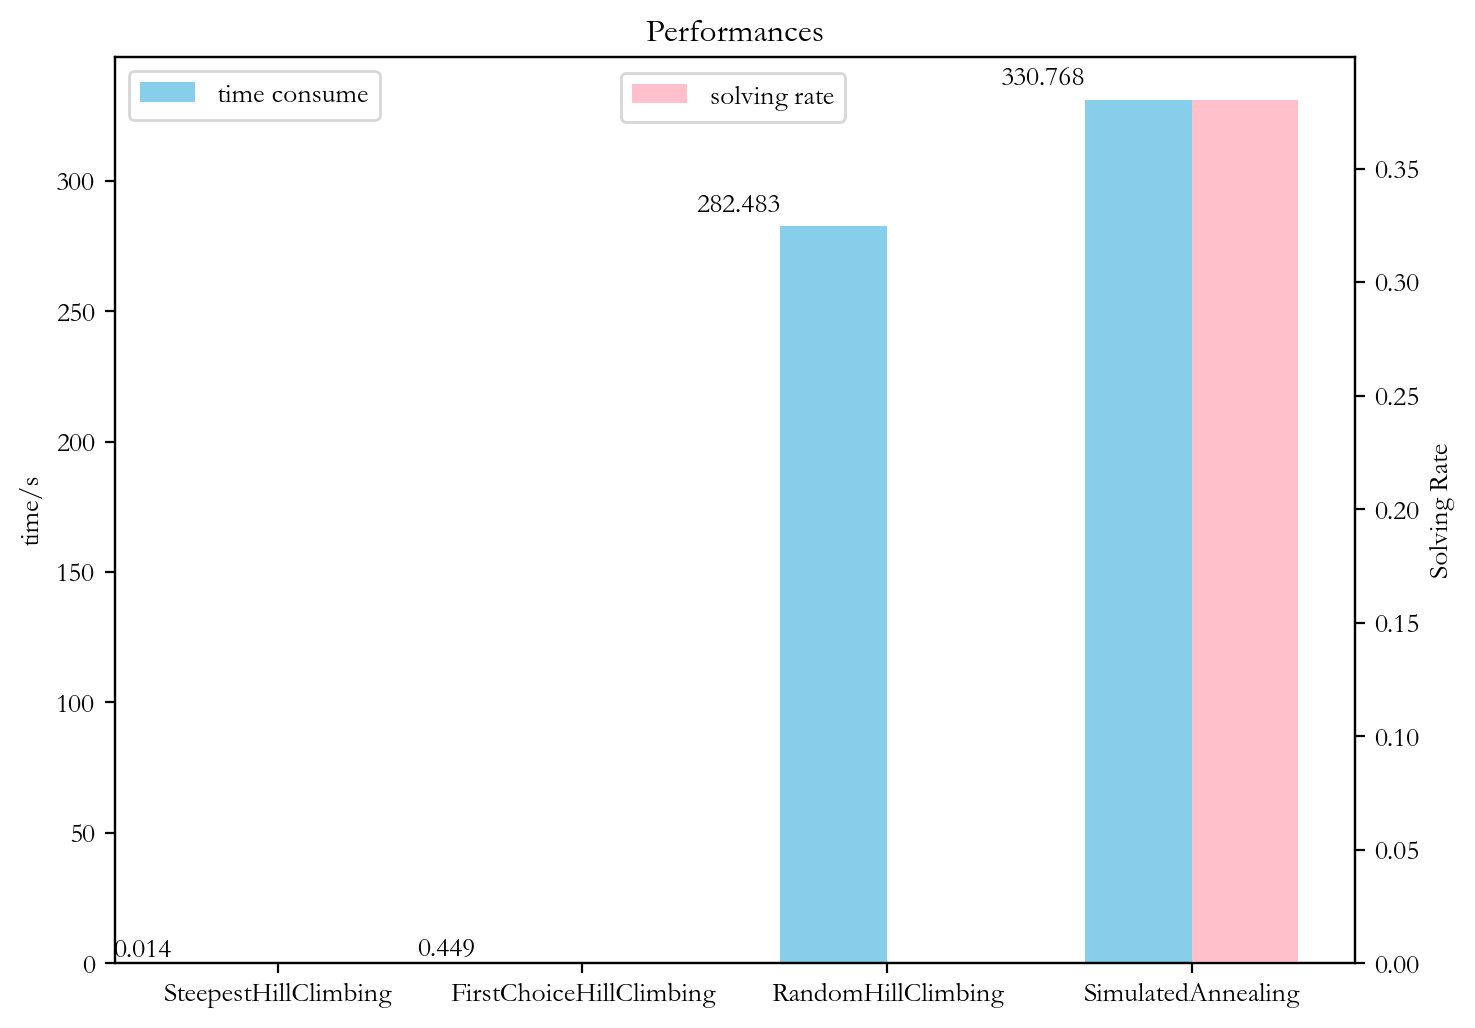

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'STSong'
matplotlib.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 200
t = np.array((round(t1,3), round(t2,3), round(t3,3), round(t4,3)))
s = np.array((round(a1,3), round(a2,3), round(a3,3), round(a4,3)))

ind = np.arange(len(t))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(ind - width/2, t, width, color='SkyBlue', label = 'time consume')
par2 = ax.twinx()
rects2 = par2.bar(ind + width/2, s, width, color='Pink', label = 'solving rate')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('time/s')
ax.set_title('Performances')
ax.set_xticks(ind)
ax.set_xticklabels(('SteepestHillClimbing', 'FirstChoiceHillClimbing', 'RandomHillClimbing', 'SimulatedAnnealing'))
ax.legend()
par2.set_ylabel('Solving Rate')
par2.legend(bbox_to_anchor=(0.6,0.998))
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')
        
autolabel(rects1, "left")

plt.show()